In [534]:
import pandas as pd
import numpy as np
import csv
import re
from bs4 import BeautifulSoup
import camelot 

from tabula import read_pdf
from tabulate import tabulate
from itertools import chain
import matplotlib as plt

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# %matplotlib inline
%config InlineBackend.figure_format='retina'
# If encounter SSL certify error - go to your Python 3.x.x folder and install Certification 

In [541]:
csv = pd.read_csv('farm_smoke.csv')
sonoma_data = csv.query('County == "Sonoma" and Year >= 2011').copy().reset_index(drop=True)
sonoma_data

,County,Year,Links
0,Sonoma,2021,https://sonomacounty.ca.gov//Main%20County%20S...
1,Sonoma,2020,https://sonomacounty.ca.gov//Main%20County%20S...
2,Sonoma,2019,https://sonomacounty.ca.gov//Main%20County%20S...
3,Sonoma,2018,https://sonomacounty.ca.gov//Main%20County%20S...
4,Sonoma,2017,https://sonomacounty.ca.gov//Main%20County%20S...
5,Sonoma,2016,https://sonomacounty.ca.gov//Main%20County%20S...
6,Sonoma,2015,https://sonomacounty.ca.gov//Main%20County%20S...
7,Sonoma,2014,https://sonomacounty.ca.gov//Main%20County%20S...
8,Sonoma,2013,https://sonomacounty.ca.gov//Main%20County%20S...
9,Sonoma,2012,https://sonomacounty.ca.gov//Main%20County%20S...


In [542]:
urls = sonoma_data['Links']
urls

0     https://sonomacounty.ca.gov//Main%20County%20S...
1     https://sonomacounty.ca.gov//Main%20County%20S...
2     https://sonomacounty.ca.gov//Main%20County%20S...
3     https://sonomacounty.ca.gov//Main%20County%20S...
4     https://sonomacounty.ca.gov//Main%20County%20S...
5     https://sonomacounty.ca.gov//Main%20County%20S...
6     https://sonomacounty.ca.gov//Main%20County%20S...
7     https://sonomacounty.ca.gov//Main%20County%20S...
8     https://sonomacounty.ca.gov//Main%20County%20S...
9     https://sonomacounty.ca.gov//Main%20County%20S...
10    https://sonomacounty.ca.gov//Main%20County%20S...
Name: Links, dtype: object

In [548]:
# Note 1: 2021 - 2017 can work together 
# Note 2: 2016 - format diff, have -- and ' .' formating, top 12 reds 
# Note 3: 2015, 2014 - top 12 reds
# Note 4: 2013, 2012 - format change, words and style is diff; need to change camelot

table_list = []
for link, year in zip(urls, sonoma_data['Year']):
    page = '12'
    if year == 2017:
        page = '10'
    elif year == 2016 or year == 2013 or year == 2011 or year == 2010:
        page = '8'
    elif year == 2014 or year == 2012:
        page = '7'
    # utilize camelot to read pdf file at page 12, 
    # capture precisely with stream and close up the row gap with row_tol = 10

    if year <= 2011:
        # specific reads for 2011
        tables = camelot.read_pdf(link, pages=page, table_areas=['30,720,600,250'], flavor='stream', row_tol=8)[0].df
    elif year != 2012 and year != 2013:
        tables = camelot.read_pdf(link, pages=page, flavor='stream', row_tol=10)[0].df
    
    display(tables)
    table_list.append(tables)


,0,1,2,3,4,5,6,7
0,,,TOP 13 BY VALUE - LISTED ALPHABETICALLY,,,,,
1,,,,Acreage,,,Production,
2,Varietal,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
3,Cabernet Franc,2021,552.0,33.0,585.0,"1,150.4","$3,866.85","$4,448,400"
4,,2020,557 0,29 0,586 0,942 4,"$3,534 95","$3,331,300"
5,Cabernet,2021,"12,293.0",429.0,"12,722.0","41,114.6","$2,728.69","$112,189,000"
6,Sauvignon,2020,"12,089 0",631 0,"12,720 0","31,137 9","$2,460 15","$76,603,900"
7,Carignane,2021,156.0,2.0,158.0,280.7,"$2,633.52","$739,200"
8,,2020,158 0,6 0,164 0,257 9,"$2,447 30","$631,200"
9,Grenache,2021,211.0,55.0,266.0,898.4,"$3,101.70","$2,786,600"


,0,1,2,3,4,5,6,7
0,,,TOP 13 BY VALUE - LISTED ALPHABETICALLY,,,,,
1,,,,Acreage,,,Production,
2,Varietal,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
3,Cabernet Franc,2020,557.0,29.0,586.0,942.4,"$3,534.95","$3,331,300"
4,,2019,562.0,13.0,575.0,"1,533.4","$3,815.93","$5,851,300"
5,Cabernet,2020,"12,089.0",631.0,"12,720.0","31,137.9","$2,460.15","$76,603,900"
6,Sauvignon,2019,"12,082.0",539.0,"12,621.0","45,948.3","$3,055.93","$140,414,800"
7,Carignane,2020,158.0,6.0,164.0,257.9,"$2,447.30","$631,200"
8,,2019,170.0,6.0,176.0,416.5,"$2,591.56","$1,079,400"
9,Grenache,2020,203.0,58.0,261.0,751.7,"$2,509.56","$1,886,400"


,0,1,2,3,4,5,6,7
0,,,TOP 13 BY VALUE - LISTED ALPHABETICALLY,,,,,
1,,,,Acreage,,,Production,
2,Varietal,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
3,Cabernet Franc,2019,562.0,13.0,575.0,"1,533.4","$3,815.93","$5,851,300"
4,,2018,565.0,10.6,575.6,"1,832.6","$3,567.17","$6,537,200"
5,Cabernet,2019,"12,082.0",539.0,"12,621.0","45,948.3","$3,055.93","$140,414,800"
6,Sauvignon,2018,"12,505.1",642.3,"13,147.4","56,948.2","$3,113.75","$177,322,500"
7,Carignane,2019,170.0,6.0,176.0,416.5,"$2,591.56","$1,079,400"
8,,2018,162.7,9.7,172.4,406.9,"$2,654.55","$1,080,100"
9,Grenache,2019,183.0,43.0,226.0,806.1,"$3,203.49","$2,582,300"


,0,1,2,3,4,5,6,7
0,,,TOP 13 BY VALUE - LISTED ALPHABETICALLY,,,,,
1,,,,Acreage,,,Production,
2,Varietal,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
3,Cabernet Franc,2018,565.0,10.6,575.6,"1,832.6","$3,567.17","$6,537,200"
4,,2017,565.0,35.6,600.6,"1,382.4","$3,335.31","$4,610,700"
5,Cabernet,2018,"12,505.1",642.3,"13,147.4","56,948.2","$3,113.75","$177,322,500"
6,Sauvignon,2017,"12,530.9",530.4,"13,061.3","43,157.9","$3,071.98","$132,580,200"
7,Carignane,2018,162.7,9.7,172.4,406.9,"$2,654.55","$1,080,100"
8,,2017,162.7,0.0,162.7,260.4,"$2,665.76","$694,200"
9,Grenache,2018,150.2,12.1,162.3,929.0,"$3,025.64","$2,810,800"


,0,1,2,3,4,5,6,7
0,,,,TOP 13 BY VALUE - LISTED ALPHABETICALLY,,,,
1,,,,Acreage,,,Production,
2,Varietal,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
3,Cabernet Franc,2017,565.0,35.6,600.6,"1,382.4","$3,335.31","$4,610,700"
4,,2016,578 5,28 5,607 0,"1,382 5","$2,955 14","$4,085,500"
5,Cabernet,2017,"12,530.9",530.4,"13,061.3","43,157.9","$3,071.98","$132,580,200"
6,Sauvignon,2016,"12,456 7",560 0,"13,016 7","41,575 7","$2,964 60","$123,255,300"
7,,2017,162.7,0.0,162.7,260.4,"$2,665.76","$694,200"
8,Carignane,2016,162 7,0 0,162 7,305 8,"$2,195 62","$671,500"
9,Grenache,2017,153.8,8.0,161.8,854.7,"$3,076.99","$2,630,000"


,0,1,2,3,4,5,6,7
0,,,Acreage,,,,Production,
1,Varietal,Year,Non-Bearing,Bearing,Total,Tons,$/Tons,Total Value
2,,2016,385.2,"13,343.1","13,728.3","42,566.3","$3,680.50","$156,665,300"
3,Pinot Noir,2015,750 .0,"12,850 .8","13,600 .8","30,667 .2","$3,525 .42","$108,114,800"
4,Cabernet,2016,560.0,"12,456.7","13,016.7","41,575.7","$2,964.60","$123,255,300"
5,Sauvignon,2015,"1,014 .7","11,808 .8","12,823 .5","32,947 .3","$2,724 .17","$89,754,100"
6,,2016,20.0,"5,070.5","5,090.5","15,287.7","$2,840.06","$43,418,000"
7,Zinfandel,2015,85 .1,"4,988 .3","5,073 .4","13,070 .9","$2,711 .07","$35,436,200"
8,,2016,24.6,"4,115.7","4,140.3","13,761.0","$1,818.10","$25,018,900"
9,Merlot,2015,43 .4,"4,108 .2","4,151 .6","12,031 .4","$1,717 .25","$20,661,000"


,0,1,2,3,4,5,6,7
0,,,,Acreage,,,Production,
1,Varietal,Year,Bearing,Non-Bearing,Total,Tons,$/Tons,Total Value
2,,2015,569.9,34.3,604.1,"1,357.8","$2,794.59","$3,794,400"
3,Cabernet Franc,2014,571.8,15.8,587.6,"1,913.9","$2,669.35","$5,108,900"
4,Cabernet,2015,"11,808.8","1,014.7","12,823.4","32,947.3","$2,724.17","$89,754,100"
5,Sauvignon,2014,11 689.7,"1,078.2","12,767.9","45,772.0","$2,614.37","$119,665,000"
6,,2015,162.7,0.0,162.7,305.8,"$2,195.62","$671,500"
7,Carignane,2014,178.8,1.0,179.8,478.8,"$1,947.37","$932,500"
8,,2015,146.4,3.7,150.1,567.4,"$2,901.69","$1,646,500"
9,Grenache,2014,119.3,5.2,124.5,701.7,"$2,830.53","$1,986,200"


,0,1,2,3,4,5,6,7
0,Top 12,,,Acreage,,,Production,
1,Red Varieties,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
2,Cabernet Franc,2014,571.8,15.8,587.6,"1,913.9","$2,669.35","$5,108,900"
3,,2013,604.5,13.2,617.7,"1,917.8","$2,445.23","$4,689,500"
4,Cabernet Sauvignon,2014,"11,689.7","1,078.2","12,767.9","45,772.0","$2,614.37","$119,665,000"
5,,2013,"11,830.3","1,070.8","12,901.1","44,255.8","$2,462.99","$109,001,600"
6,Carignane,2014,178.8,1.0,179.8,478.8,"$1,947.37","$932,500"
7,,2013,579.6,4.0,583.6,506.7,"$1,870.18","$947,700"
8,Malbec,2014,491.0,41.8,532.8,"2,688.9","$2,427.49","$6,527,300"
9,,2013,425.7,109.4,535.1,"2,706.6","$2,356.19","$6,377,300"


,0,1,2,3,4,5,6,7
0,Top 12,,,Acreage,,,Production,
1,Red Varieties,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
2,Cabernet Franc,2014,571.8,15.8,587.6,"1,913.9","$2,669.35","$5,108,900"
3,,2013,604.5,13.2,617.7,"1,917.8","$2,445.23","$4,689,500"
4,Cabernet Sauvignon,2014,"11,689.7","1,078.2","12,767.9","45,772.0","$2,614.37","$119,665,000"
5,,2013,"11,830.3","1,070.8","12,901.1","44,255.8","$2,462.99","$109,001,600"
6,Carignane,2014,178.8,1.0,179.8,478.8,"$1,947.37","$932,500"
7,,2013,579.6,4.0,583.6,506.7,"$1,870.18","$947,700"
8,Malbec,2014,491.0,41.8,532.8,"2,688.9","$2,427.49","$6,527,300"
9,,2013,425.7,109.4,535.1,"2,706.6","$2,356.19","$6,377,300"


,0,1,2,3,4,5,6,7
0,Top 12,,,Acreage,,,Production,
1,Red Varieties,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
2,Cabernet Franc,2014,571.8,15.8,587.6,"1,913.9","$2,669.35","$5,108,900"
3,,2013,604.5,13.2,617.7,"1,917.8","$2,445.23","$4,689,500"
4,Cabernet Sauvignon,2014,"11,689.7","1,078.2","12,767.9","45,772.0","$2,614.37","$119,665,000"
5,,2013,"11,830.3","1,070.8","12,901.1","44,255.8","$2,462.99","$109,001,600"
6,Carignane,2014,178.8,1.0,179.8,478.8,"$1,947.37","$932,500"
7,,2013,579.6,4.0,583.6,506.7,"$1,870.18","$947,700"
8,Malbec,2014,491.0,41.8,532.8,"2,688.9","$2,427.49","$6,527,300"
9,,2013,425.7,109.4,535.1,"2,706.6","$2,356.19","$6,377,300"


,0,1,2,3,4,5,6,7
0,,,,Acreage,,,Production,
1,Red Varieties,Year,,Bearing Non-Bearing,Total,Tons,$/Ton,Total Value
2,Cabernet Franc,2011,655.9,6.7,662.6,"1,568.6","$ 2,209.15","$\n3,465,300"
3,,2010,653.9,14.3,668.2,"1,436.3","$ 2,166.55","$\n3,111,900"
4,Cabernet Sauvignon,2011,"11,726.8",291.5,"12,018.3","33,126.8","$ 2,111.24","$\n69,938,700"
5,,2010,"11,549.0",468.3,"12,017.3","37,933.3","$ 2,083.96","$\n79,051,500"
6,Carignane,2011,615.4,0.0,615.4,373.2,"$ 2,019.14","$\n753,600"
7,,2010,180.3,1.0,181.3,270.4,"$ 1,949.11","$\n527,100"
8,Malbec,2011,322.4,76.6,399.0,"1,110.5","$ 2,340.51","$\n2,599,200"
9,,2010,310.4,69.1,379.5,770.5,"$ 2,430.83","$\n1,873,000"


In [549]:
def rename_replace_varietal_column(table, year):
    new_columns = ['Varietal', 'Year', 'Bearing' , 'Non-Bearing', 'Total', 'Tons', '$/Ton', 'Total Value']
    data = table.rename(columns=dict(zip(table.columns,new_columns)))

    if year == 2011:
        # 2011 specific fixes
        data.loc[24][0] = data.loc[25][0]
        data.loc[27][0] = data.loc[28][0]
        data.loc[28][0] = ''

        # data drop empty row
        data = data.query("Year != '' and Bearing != '' and Total != '' and Tons != ''")

    data['Varietal'] = data['Varietal'].replace('Mataro/', 'Mataro/Mouvedere')
    data['Varietal'] = data['Varietal'].replace('Cabernet', 'Cabernet Sauvignon')

    # for 2016 only; ignored when dataset does not contain these strings
    data['Varietal'] = data['Varietal'].replace('Sangiovese/', 'Sangiovese/Sangioveto')

    # added Mourvedere (a), Sangioveto bc of 2016
    data['Varietal'] = data['Varietal'].replace(['', 'including other reds', 'Mouvedere', 'Mourvedere (a)', 'Sauvignon', 'Sangioveto'], np.nan)
    data = data.reset_index(drop=True)

    # duplicate each variable twice because there is empty space after each variable 
    # For example: Zinfandel 2015 2014 to Zinfandel 2015 Zinfandel 2014
    data['Varietal'] = data['Varietal'].dropna().repeat(2).reset_index(drop=True)

    return data

def add_shift_county_color_column(data):

    # add columns to last and pop
    data['County'] = 'Sonoma'
    first_column = data.pop('County')
    data['Grape Color'] = 'Red'
    third_column = data.pop('Grape Color')

    # put county as first column, grape color as 3rd
    data.insert(0, 'County', first_column)
    data.insert(2, 'Grape Color', third_column)
    return data

def fix_incorrect_digits(data, year):
    # if exist a string that has empty space, add a '.' to complete the number
    
    if year == 2016:
        data['Bearing'] = data['Bearing'].str.replace(' .', '.', regex=False)
        data['Bearing'] = data['Bearing'].str.replace('--', '0.0', regex=False)
        data['Non-Bearing'] = data['Non-Bearing'].str.replace(' .', '.', regex=False)
        data['Non-Bearing'] = data['Non-Bearing'].str.replace('--', '0.0', regex=False)

        data['Total'] = data['Total'].str.replace(' .', '.', regex=False)
        data['Total'].str.replace('--', '0.0', regex=False)
        data['$/Ton'].str.replace(' .', '.', regex=False)
        data['Total Value'].str.replace(' ', ',')
    elif year == 2011:
        # for 2011 only 
        data['Bearing'] = data['Bearing'].str.replace(' ', '.')
        data['Non-Bearing'] = data['Non-Bearing'].str.replace(' ', '.')
        data['Total'] = data['Total'].str.replace(' ', '.')
        data['Tons'] = data['Tons'].str.replace(' ', '.')
        data['$/Ton'] = data['$/Ton'].str.replace(' ', '')
        # data['Total Value'] = data['Total Value'].str.replace(' ', ',')

        # specific for 2011
        data['Bearing'] = data['Bearing'].str.replace('*', '', regex=False)
        data['Tons'] = data['Tons'].str.replace('*', '', regex=False)
        data['$/Ton'] = data['$/Ton'].str.replace('*', '', regex=False)
        data['Total Value'] = data['Total Value'].str.replace('\n', '', regex=False)
        data['Total Value'] = data['Total Value'].str.replace('(a)  $ ', '$', regex=False)
        data['Total Value'] = data['Total Value'].str.replace('*', '', regex=False)           
    else:
        data['Bearing'] = data['Bearing'].str.replace(' ', '.')
        data['Non-Bearing'] = data['Non-Bearing'].str.replace(' ', '.')
        data['Total'] = data['Total'].str.replace(' ', '.')
        data['Tons'] = data['Tons'].str.replace(' ', '.')
        data['$/Ton'] = data['$/Ton'].str.replace(' ', '.')
        data['Total Value'] = data['Total Value'].str.replace(' ', ',')
    return data
        

In [550]:
# for <= 2016 we need to do it separately because of formatting 


# this goes up to 2017 files
for table, year in zip(table_list, sonoma_data['Year']):
    # 2021 - 2017 has a pattern where first 3 rows didn't matter
    
    if year >= 2017:
        table.drop([0,1,2], axis=0, inplace=True)

        # rename column names
        data_varietal_replaced = rename_replace_varietal_column(table, year)
        data_shifted = add_shift_county_color_column(data_varietal_replaced)

        # if exist a string that has empty space, add a '.' to complete the number
        data = fix_incorrect_digits(data_shifted, year)

        print(f'number of row for year {year} table is: {len(data)}')

        # display(data)
    # skips 2012 and 2013, their PDFs are not extractable
    elif year <= 2016 and year != 2013 and year != 2012:
        table.drop([0,1], axis=0, inplace=True)

        # rename column names
        data_varietal_replaced = rename_replace_varietal_column(table, year)
        data_shifted = add_shift_county_color_column(data_varietal_replaced)

        # if exist a string that has empty space, add a '.' to complete the number
        data = fix_incorrect_digits(data_shifted, year)

        print(f'number of row for year {year} table is: {len(data)}')
        display(data)



number of row for year 2021 table is: 28
number of row for year 2020 table is: 28
number of row for year 2019 table is: 28
number of row for year 2018 table is: 28
number of row for year 2017 table is: 28
number of row for year 2016 table is: 26


,County,Varietal,Grape Color,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
0,Sonoma,Pinot Noir,Red,2016,385.2,"13,343.1","13,728.3","42,566.3","$3,680.50","$156,665,300"
1,Sonoma,Pinot Noir,Red,2015,750.0,"12,850.8","13,600.8","30,667 .2","$3,525 .42","$108,114,800"
2,Sonoma,Cabernet Sauvignon,Red,2016,560.0,"12,456.7","13,016.7","41,575.7","$2,964.60","$123,255,300"
3,Sonoma,Cabernet Sauvignon,Red,2015,"1,014.7","11,808.8","12,823.5","32,947 .3","$2,724 .17","$89,754,100"
4,Sonoma,Zinfandel,Red,2016,20.0,"5,070.5","5,090.5","15,287.7","$2,840.06","$43,418,000"
5,Sonoma,Zinfandel,Red,2015,85.1,"4,988.3","5,073.4","13,070 .9","$2,711 .07","$35,436,200"
6,Sonoma,Merlot,Red,2016,24.6,"4,115.7","4,140.3","13,761.0","$1,818.10","$25,018,900"
7,Sonoma,Merlot,Red,2015,43.4,"4,108.2","4,151.6","12,031 .4","$1,717 .25","$20,661,000"
8,Sonoma,Syrah - Shiraz,Red,2016,13.5,"1,575.6","1,589.1","3,618.1","$2,596.01","$9,392,600"
9,Sonoma,Syrah - Shiraz,Red,2015,15.5,"1,569.8","1,585.3","2,848 .1","$2,525 .16","$7,192,000"


number of row for year 2015 table is: 26


,County,Varietal,Grape Color,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
0,Sonoma,Cabernet Franc,Red,2015,569.9,34.3,604.1,"1,357.8","$2,794.59","$3,794,400"
1,Sonoma,Cabernet Franc,Red,2014,571.8,15.8,587.6,"1,913.9","$2,669.35","$5,108,900"
2,Sonoma,Cabernet Sauvignon,Red,2015,"11,808.8","1,014.7","12,823.4","32,947.3","$2,724.17","$89,754,100"
3,Sonoma,Cabernet Sauvignon,Red,2014,11.689.7,"1,078.2","12,767.9","45,772.0","$2,614.37","$119,665,000"
4,Sonoma,Carignane,Red,2015,162.7,0.0,162.7,305.8,"$2,195.62","$671,500"
5,Sonoma,Carignane,Red,2014,178.8,1.0,179.8,478.8,"$1,947.37","$932,500"
6,Sonoma,Grenache,Red,2015,146.4,3.7,150.1,567.4,"$2,901.69","$1,646,500"
7,Sonoma,Grenache,Red,2014,119.3,5.2,124.5,701.7,"$2,830.53","$1,986,200"
8,Sonoma,Malbec,Red,2015,540.5,12.9,553.4,"1,896.3","$2,636.24","$4,999,200"
9,Sonoma,Malbec,Red,2014,491.0,41.8,532.8,"2,688.9","$2,427.49","$6,527,300"


number of row for year 2014 table is: 26


,County,Varietal,Grape Color,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
0,Sonoma,Cabernet Franc,Red,2014,571.8,15.8,587.6,"1,913.9","$2,669.35","$5,108,900"
1,Sonoma,Cabernet Franc,Red,2013,604.5,13.2,617.7,"1,917.8","$2,445.23","$4,689,500"
2,Sonoma,Cabernet Sauvignon,Red,2014,"11,689.7","1,078.2","12,767.9","45,772.0","$2,614.37","$119,665,000"
3,Sonoma,Cabernet Sauvignon,Red,2013,"11,830.3","1,070.8","12,901.1","44,255.8","$2,462.99","$109,001,600"
4,Sonoma,Carignane,Red,2014,178.8,1.0,179.8,478.8,"$1,947.37","$932,500"
5,Sonoma,Carignane,Red,2013,579.6,4.0,583.6,506.7,"$1,870.18","$947,700"
6,Sonoma,Malbec,Red,2014,491.0,41.8,532.8,"2,688.9","$2,427.49","$6,527,300"
7,Sonoma,Malbec,Red,2013,425.7,109.4,535.1,"2,706.6","$2,356.19","$6,377,300"
8,Sonoma,Merlot,Red,2014,"4,308.6",27.7,"4,336.2","16,989.6","$1,651.47","$28,057,900"
9,Sonoma,Merlot,Red,2013,"4,619.9",27.3,"4,647.2","18,784.5","$1,607.03","$30,187,300"


number of row for year 2011 table is: 26


/var/folders/9p/903r2xb14n1g60nzc3n_qdfw0000gn/T/ipykernel_69076/3673737813.py:66: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Bearing'] = data['Bearing'].str.replace('*', '')


,County,Varietal,Grape Color,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
0,Sonoma,Cabernet Franc,Red,2011,655.9,6.7,662.6,"1,568.6","$2,209.15","$3,465,300"
1,Sonoma,Cabernet Franc,Red,2010,653.9,14.3,668.2,"1,436.3","$2,166.55","$3,111,900"
2,Sonoma,Cabernet Sauvignon,Red,2011,"11,726.8",291.5,"12,018.3","33,126.8","$2,111.24","$69,938,700"
3,Sonoma,Cabernet Sauvignon,Red,2010,"11,549.0",468.3,"12,017.3","37,933.3","$2,083.96","$79,051,500"
4,Sonoma,Carignane,Red,2011,615.4,0.0,615.4,373.2,"$2,019.14","$753,600"
5,Sonoma,Carignane,Red,2010,180.3,1.0,181.3,270.4,"$1,949.11","$527,100"
6,Sonoma,Malbec,Red,2011,322.4,76.6,399.0,"1,110.5","$2,340.51","$2,599,200"
7,Sonoma,Malbec,Red,2010,310.4,69.1,379.5,770.5,"$2,430.83","$1,873,000"
8,Sonoma,Merlot,Red,2011,"5,126.6",23.4,"5,149.9","14,670.5","$1,380.85","$20,257,800"
9,Sonoma,Merlot,Red,2010,"5,248.0",55.6,"5,303.6","17,440.9","$1,297.08","$22,622,300"


In [315]:
#2011 is urls[10]
urls[10]

'https://sonomacounty.ca.gov//Main%20County%20Site/Natural%20Resources/Agricultural%2C%20Weights%20%26%20Measures/Documents/Crop%20Reports/2011_crop_report.pdf'

In [502]:
# utilize camelot to read pdf file at page 12, capture precisely with stream and close up the row gap with row_tol = 10
# table_areas=['30,700,600,280'], row_tol = 10
# table_areas=['30,700,550,280'], 
# edge_tool=500
tables = camelot.read_pdf(urls[10], pages='8', table_areas=['30,720,600,250'], flavor='stream', row_tol=8)
data = tables[0].df
dat = tables[0].parsing_report
dat

{'accuracy': 99.64, 'whitespace': 12.07, 'order': 1, 'page': 8}

/var/folders/9p/903r2xb14n1g60nzc3n_qdfw0000gn/T/ipykernel_69076/2005142002.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(tables[0], kind='contour').show()


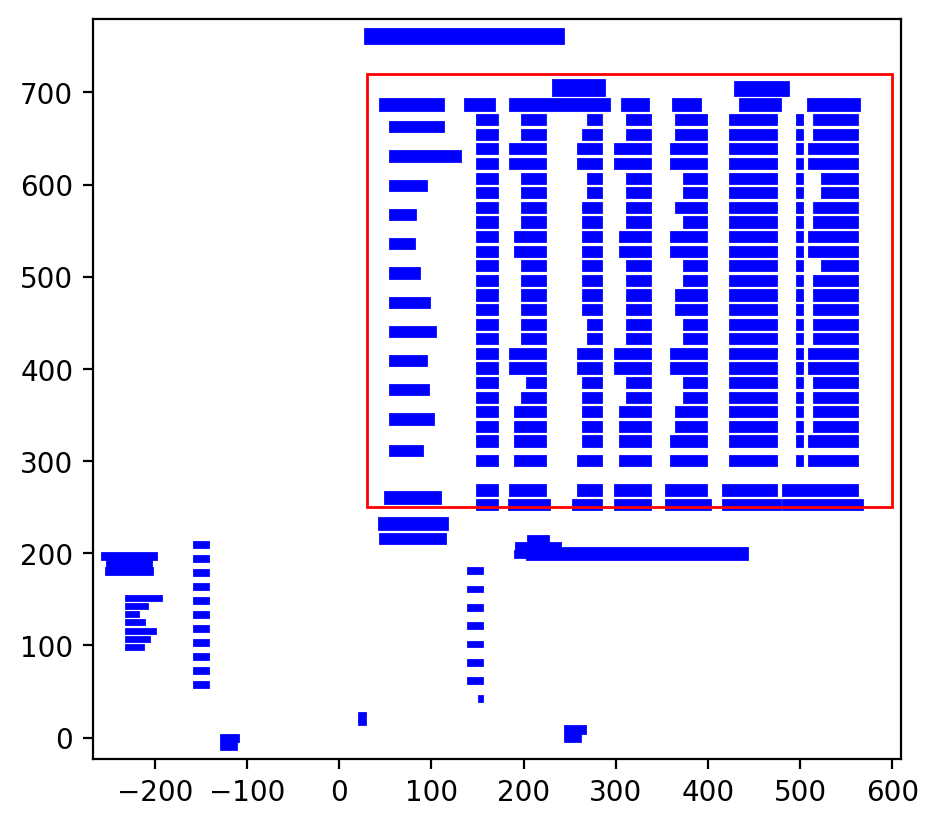

In [503]:
camelot.plot(tables[0], kind='contour').show()

In [504]:
data

,0,1,2,3,4,5,6,7
0,,,,Acreage,,,Production,
1,Red Varieties,Year,,Bearing Non-Bearing,Total,Tons,$/Ton,Total Value
2,Cabernet Franc,2011,655.9,6.7,662.6,"1,568.6","$ 2,209.15","$\n3,465,300"
3,,2010,653.9,14.3,668.2,"1,436.3","$ 2,166.55","$\n3,111,900"
4,Cabernet Sauvignon,2011,"11,726.8",291.5,"12,018.3","33,126.8","$ 2,111.24","$\n69,938,700"
5,,2010,"11,549.0",468.3,"12,017.3","37,933.3","$ 2,083.96","$\n79,051,500"
6,Carignane,2011,615.4,0.0,615.4,373.2,"$ 2,019.14","$\n753,600"
7,,2010,180.3,1.0,181.3,270.4,"$ 1,949.11","$\n527,100"
8,Malbec,2011,322.4,76.6,399.0,"1,110.5","$ 2,340.51","$\n2,599,200"
9,,2010,310.4,69.1,379.5,770.5,"$ 2,430.83","$\n1,873,000"


In [505]:
# drop rows that is not helpful
data = data.drop([0,1], axis=0)

# for 2011 report, also drop an empty row 

In [506]:
data

,0,1,2,3,4,5,6,7
2,Cabernet Franc,2011,655.9,6.7,662.6,"1,568.6","$ 2,209.15","$\n3,465,300"
3,,2010,653.9,14.3,668.2,"1,436.3","$ 2,166.55","$\n3,111,900"
4,Cabernet Sauvignon,2011,"11,726.8",291.5,"12,018.3","33,126.8","$ 2,111.24","$\n69,938,700"
5,,2010,"11,549.0",468.3,"12,017.3","37,933.3","$ 2,083.96","$\n79,051,500"
6,Carignane,2011,615.4,0.0,615.4,373.2,"$ 2,019.14","$\n753,600"
7,,2010,180.3,1.0,181.3,270.4,"$ 1,949.11","$\n527,100"
8,Malbec,2011,322.4,76.6,399.0,"1,110.5","$ 2,340.51","$\n2,599,200"
9,,2010,310.4,69.1,379.5,770.5,"$ 2,430.83","$\n1,873,000"
10,Merlot,2011,"5,126.6",23.4,"5,149.9","14,670.5","$ 1,380.85","$\n20,257,800"
11,,2010,"5,248.0",55.6,"5,303.6","17,440.9","$ 1,297.08","$\n22,622,300"


In [507]:
# rename my columns
new_columns = ['Varietal', 'Year', 'Bearing' , 'Non-Bearing', 'Total', 'Tons', '$/Ton', 'Total Value']
data = data.rename(columns=dict(zip(data.columns,new_columns)))
data

,Varietal,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
2,Cabernet Franc,2011,655.9,6.7,662.6,"1,568.6","$ 2,209.15","$\n3,465,300"
3,,2010,653.9,14.3,668.2,"1,436.3","$ 2,166.55","$\n3,111,900"
4,Cabernet Sauvignon,2011,"11,726.8",291.5,"12,018.3","33,126.8","$ 2,111.24","$\n69,938,700"
5,,2010,"11,549.0",468.3,"12,017.3","37,933.3","$ 2,083.96","$\n79,051,500"
6,Carignane,2011,615.4,0.0,615.4,373.2,"$ 2,019.14","$\n753,600"
7,,2010,180.3,1.0,181.3,270.4,"$ 1,949.11","$\n527,100"
8,Malbec,2011,322.4,76.6,399.0,"1,110.5","$ 2,340.51","$\n2,599,200"
9,,2010,310.4,69.1,379.5,770.5,"$ 2,430.83","$\n1,873,000"
10,Merlot,2011,"5,126.6",23.4,"5,149.9","14,670.5","$ 1,380.85","$\n20,257,800"
11,,2010,"5,248.0",55.6,"5,303.6","17,440.9","$ 1,297.08","$\n22,622,300"


In [508]:
# 24		2011	5,216.8	81.1	5,297.9	13,101.0	$ 2,357.61	$\n30,887,100
# 25	Zinfandel							
data.loc[24][0] = data.loc[25][0]
data.loc[27][0] = data.loc[28][0]
data.loc[28][0] = ''

# data drop empty row
data = data.query("Year != '' and Bearing != '' and Total != '' and Tons != ''")
data

,Varietal,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
2,Cabernet Franc,2011,655.9,6.7,662.6,"1,568.6","$ 2,209.15","$\n3,465,300"
3,,2010,653.9,14.3,668.2,"1,436.3","$ 2,166.55","$\n3,111,900"
4,Cabernet Sauvignon,2011,"11,726.8",291.5,"12,018.3","33,126.8","$ 2,111.24","$\n69,938,700"
5,,2010,"11,549.0",468.3,"12,017.3","37,933.3","$ 2,083.96","$\n79,051,500"
6,Carignane,2011,615.4,0.0,615.4,373.2,"$ 2,019.14","$\n753,600"
7,,2010,180.3,1.0,181.3,270.4,"$ 1,949.11","$\n527,100"
8,Malbec,2011,322.4,76.6,399.0,"1,110.5","$ 2,340.51","$\n2,599,200"
9,,2010,310.4,69.1,379.5,770.5,"$ 2,430.83","$\n1,873,000"
10,Merlot,2011,"5,126.6",23.4,"5,149.9","14,670.5","$ 1,380.85","$\n20,257,800"
11,,2010,"5,248.0",55.6,"5,303.6","17,440.9","$ 1,297.08","$\n22,622,300"


In [509]:
data['Varietal'].unique()

array(['Cabernet Franc', '', 'Cabernet Sauvignon', 'Carignane', 'Malbec',
       'Merlot', 'Meunier', 'Petite Sirah', 'Petite Verdot', 'Pinot Noir',
       'Sangiovese', 'Syrah-Shiraz', 'Zinfandel', 'TOTAL REDS'],
      dtype=object)

In [510]:
# data.loc[data['Varietal'].str.contains('Cabernet'), 'Varietal'] = 'Cabernet Sauvignon'
# data.loc[data['Varietal'].str.contains('Sangiovese/'), 'Varietal'] = 'Sangiovese/Sangioveto'

In [511]:
# data['Varietal'].str.contains('Sangiovese/')

In [512]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [513]:
data['Varietal'] = data['Varietal'].replace('Mataro/', 'Mataro/Mouvedere')
data['Varietal']= data['Varietal'].replace('Cabernet', 'Cabernet Sauvignon')

# for 2016 only 
data['Varietal'] = data['Varietal'].replace('Sangiovese/', 'Sangiovese/Sangioveto')


data['Varietal']= data['Varietal'].replace(['', 'including other reds', 'Mouvedere', 'Mourvedere (a)', 'Sauvignon', 'Sangioveto'], np.nan)
data = data.reset_index(drop=True)

data['Varietal'].unique()

array(['Cabernet Franc', nan, 'Cabernet Sauvignon', 'Carignane', 'Malbec',
       'Merlot', 'Meunier', 'Petite Sirah', 'Petite Verdot', 'Pinot Noir',
       'Sangiovese', 'Syrah-Shiraz', 'Zinfandel', 'TOTAL REDS'],
      dtype=object)

In [514]:
data['Varietal'] = data['Varietal'].dropna().repeat(2).reset_index(drop=True)
data['County'] = 'Sonoma'

In [515]:
first_column = data.pop('County')
data['Grape Color'] = 'Red'
third_column = data.pop('Grape Color')
data.insert(0, 'County', first_column)
data.insert(2, 'Grape Color', third_column)
data

,County,Varietal,Grape Color,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
0,Sonoma,Cabernet Franc,Red,2011,655.9,6.7,662.6,"1,568.6","$ 2,209.15","$\n3,465,300"
1,Sonoma,Cabernet Franc,Red,2010,653.9,14.3,668.2,"1,436.3","$ 2,166.55","$\n3,111,900"
2,Sonoma,Cabernet Sauvignon,Red,2011,"11,726.8",291.5,"12,018.3","33,126.8","$ 2,111.24","$\n69,938,700"
3,Sonoma,Cabernet Sauvignon,Red,2010,"11,549.0",468.3,"12,017.3","37,933.3","$ 2,083.96","$\n79,051,500"
4,Sonoma,Carignane,Red,2011,615.4,0.0,615.4,373.2,"$ 2,019.14","$\n753,600"
5,Sonoma,Carignane,Red,2010,180.3,1.0,181.3,270.4,"$ 1,949.11","$\n527,100"
6,Sonoma,Malbec,Red,2011,322.4,76.6,399.0,"1,110.5","$ 2,340.51","$\n2,599,200"
7,Sonoma,Malbec,Red,2010,310.4,69.1,379.5,770.5,"$ 2,430.83","$\n1,873,000"
8,Sonoma,Merlot,Red,2011,"5,126.6",23.4,"5,149.9","14,670.5","$ 1,380.85","$\n20,257,800"
9,Sonoma,Merlot,Red,2010,"5,248.0",55.6,"5,303.6","17,440.9","$ 1,297.08","$\n22,622,300"


In [516]:
# data['Year'] = data['Year'].str.replace(r'^\s+', '', regex=True)
# data
data

,County,Varietal,Grape Color,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
0,Sonoma,Cabernet Franc,Red,2011,655.9,6.7,662.6,"1,568.6","$ 2,209.15","$\n3,465,300"
1,Sonoma,Cabernet Franc,Red,2010,653.9,14.3,668.2,"1,436.3","$ 2,166.55","$\n3,111,900"
2,Sonoma,Cabernet Sauvignon,Red,2011,"11,726.8",291.5,"12,018.3","33,126.8","$ 2,111.24","$\n69,938,700"
3,Sonoma,Cabernet Sauvignon,Red,2010,"11,549.0",468.3,"12,017.3","37,933.3","$ 2,083.96","$\n79,051,500"
4,Sonoma,Carignane,Red,2011,615.4,0.0,615.4,373.2,"$ 2,019.14","$\n753,600"
5,Sonoma,Carignane,Red,2010,180.3,1.0,181.3,270.4,"$ 1,949.11","$\n527,100"
6,Sonoma,Malbec,Red,2011,322.4,76.6,399.0,"1,110.5","$ 2,340.51","$\n2,599,200"
7,Sonoma,Malbec,Red,2010,310.4,69.1,379.5,770.5,"$ 2,430.83","$\n1,873,000"
8,Sonoma,Merlot,Red,2011,"5,126.6",23.4,"5,149.9","14,670.5","$ 1,380.85","$\n20,257,800"
9,Sonoma,Merlot,Red,2010,"5,248.0",55.6,"5,303.6","17,440.9","$ 1,297.08","$\n22,622,300"


In [529]:
# for 2011 only 

data['Bearing'] = data['Bearing'].str.replace(' ', '.')
data['Non-Bearing'] = data['Non-Bearing'].str.replace(' ', '.')
data['Total'] = data['Total'].str.replace(' ', '.')
data['Tons'] = data['Tons'].str.replace(' ', '.')
data['$/Ton'] = data['$/Ton'].str.replace(' ', '')
# data['Total Value'] = data['Total Value'].str.replace(' ', ',')

# specific for 2011
data['Tons'] = data['Tons'].str.replace('*', '', regex=False)
data['$/Ton'] = data['$/Ton'].str.replace('*', '', regex=False)
data['Total Value'] = data['Total Value'].str.replace('\n', '', regex=False)
data['Total Value'] = data['Total Value'].str.replace('(a)  $ ', '$', regex=False)
data['Total Value'] = data['Total Value'].str.replace('*', '', regex=False)

In [530]:
data

,County,Varietal,Grape Color,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
0,Sonoma,Cabernet Franc,Red,2011,655.9,6.7,662.6,"1,568.6","$2,209.15","$3,465,300"
1,Sonoma,Cabernet Franc,Red,2010,653.9,14.3,668.2,"1,436.3","$2,166.55","$3,111,900"
2,Sonoma,Cabernet Sauvignon,Red,2011,"11,726.8",291.5,"12,018.3","33,126.8","$2,111.24","$69,938,700"
3,Sonoma,Cabernet Sauvignon,Red,2010,"11,549.0",468.3,"12,017.3","37,933.3","$2,083.96","$79,051,500"
4,Sonoma,Carignane,Red,2011,615.4,0.0,615.4,373.2,"$2,019.14","$753,600"
5,Sonoma,Carignane,Red,2010,180.3,1.0,181.3,270.4,"$1,949.11","$527,100"
6,Sonoma,Malbec,Red,2011,322.4,76.6,399.0,"1,110.5","$2,340.51","$2,599,200"
7,Sonoma,Malbec,Red,2010,310.4,69.1,379.5,770.5,"$2,430.83","$1,873,000"
8,Sonoma,Merlot,Red,2011,"5,126.6",23.4,"5,149.9","14,670.5","$1,380.85","$20,257,800"
9,Sonoma,Merlot,Red,2010,"5,248.0",55.6,"5,303.6","17,440.9","$1,297.08","$22,622,300"


In [190]:
# for 2016 only 

# data['Bearing'].str.replace(' .', '.', regex=False)
# data['Bearing'].str.replace('--', '0.0', regex=False)
# data['Non-Bearing'].str.replace(' .', '.', regex=False)
# data['Non-Bearing'].str.replace('--', '0.0', regex=False)

# data['Total'].str.replace(' .', '.', regex=False)
# data['Total'].str.replace('--', '0.0', regex=False)
# data['$/Ton'].str.replace(' .', '.', regex=False)
# data['Total Value'].str.replace(' ', ',')


0     $156,665,300
1     $108,114,800
2     $123,255,300
3      $89,754,100
4      $43,418,000
5      $35,436,200
6      $25,018,900
7      $20,661,000
8       $9,392,600
9       $7,192,000
10      $9,138,700
11      $6,375,100
12      $7,785,500
13      $4,999,200
14      $4,085,500
15      $3,794,400
16      $3,965,000
17      $2,593,200
18      $2,525,300
19      $2,085,700
20      $2,215,500
21      $1,646,500
22      $1,635,100
23        $461,400
24    $392,910,600
25    $287,060,000
Name: Total Value, dtype: object

In [45]:
len(data)

28

In [46]:
data.to_csv('example.csv', index=False, encoding='utf-8')

In [156]:
# data['Varietal'] = data['Varietal'].replace('', method='ffill')
# data